<a href="https://colab.research.google.com/github/seeedata/BADA/blob/main/1109%20Classification%20Practice/Session%20HW%20Code_LR%26KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install bayesian-optimization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from bayes_opt import BayesianOptimization
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from itertools import combinations
!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from tqdm import tqdm

# About Dataset

In [ ]:
original_data = pd.read_csv('/content/drive/MyDrive/BADA/1109 분류 모델 실습/센서 데이터.csv', encoding='cp949', index_col=0); original_data

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,Y
가격,11400.0000,11100.0000,14400.0000,12300.0000,15300.0000,13200.0000,11100.0000,4500.0000,6300.0000,11100.0000,...,8700.0000,11700.0000,13500.0000,4500.0000,11100.0000,11400.0000,9600.0000,9900.0000,9000.0000,NaN
1,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,N
2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,N
3,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,N
4,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Y
205,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,Y
206,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,Y
207,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,Y


In [ ]:
#price 데이터 추출
price = original_data.loc['가격'][:-1]
price

1     11400.0
2     11100.0
3     14400.0
4     12300.0
5     15300.0
6     13200.0
7     11100.0
8      4500.0
9      6300.0
10    11100.0
11    23400.0
12    28500.0
13    10500.0
14    15000.0
15     8100.0
16    10500.0
17     7500.0
18    22500.0
19    14700.0
20    23100.0
21    14400.0
22    13500.0
23    13800.0
24     4500.0
25    12000.0
26     3000.0
27     6600.0
28    12000.0
29     8700.0
30    12900.0
31    15000.0
32     3900.0
33    15900.0
34     9900.0
35     6900.0
36     8100.0
37     2700.0
38    12300.0
39     6600.0
40    21600.0
41    15000.0
42     9000.0
43     7800.0
44     6900.0
45     4200.0
46    14700.0
47    15000.0
48    21900.0
49    11100.0
50    10200.0
51    14400.0
52     8700.0
53    11700.0
54    13500.0
55     4500.0
56    11100.0
57    11400.0
58     9600.0
59     9900.0
60     9000.0
Name: 가격, dtype: object

In [ ]:
#price 없는 df 추출
df = original_data.iloc[1:, :]
#Y열 숫자형 변수로 변환
df['Y'].replace({'Y': 1, 'N': 0}, inplace = True); df

<ipython-input-5-1c4dbda06637>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y'].replace({'Y': 1, 'N': 0}, inplace = True); df


,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,Y
1,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
3,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
4,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
5,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
205,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
206,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
207,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1


In [ ]:
#결측치 여부 확인
df.isna().sum()[df.isna().sum()>=1]

#결측치 없다.

Series([], dtype: int64)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
1,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
2,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
3,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
4,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
5,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
...,...,...,...,...,...,...,...,...
57,208.0,0.007820,0.005785,0.0003,0.003700,0.00595,0.010425,0.0355
58,208.0,0.007949,0.006470,0.0003,0.003600,0.00580,0.010350,0.0440
59,208.0,0.007941,0.006181,0.0001,0.003675,0.00640,0.010325,0.0364
60,208.0,0.006507,0.005031,0.0006,0.003100,0.00530,0.008525,0.0439


In [ ]:
# df를 X와 y로 구분
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(f'{X.shape}\n{y.shape}')

(208, 60)
(208,)


In [ ]:
df['Y'].value_counts()

1    111
0     97
Name: Y, dtype: int64

# EDA

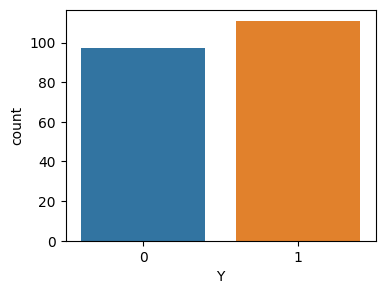

In [ ]:
plt.figure(figsize = (4, 3))
sns.countplot(data = df, x = 'Y');

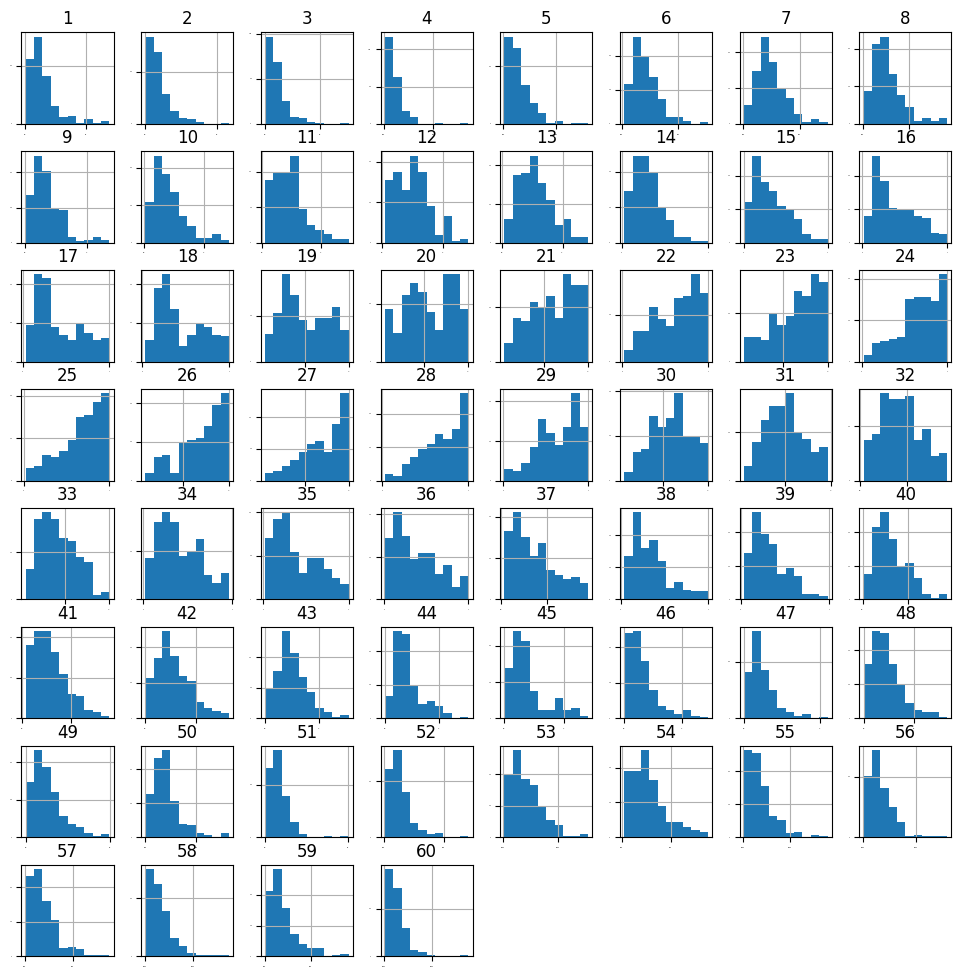

In [ ]:
# Histograms

X.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

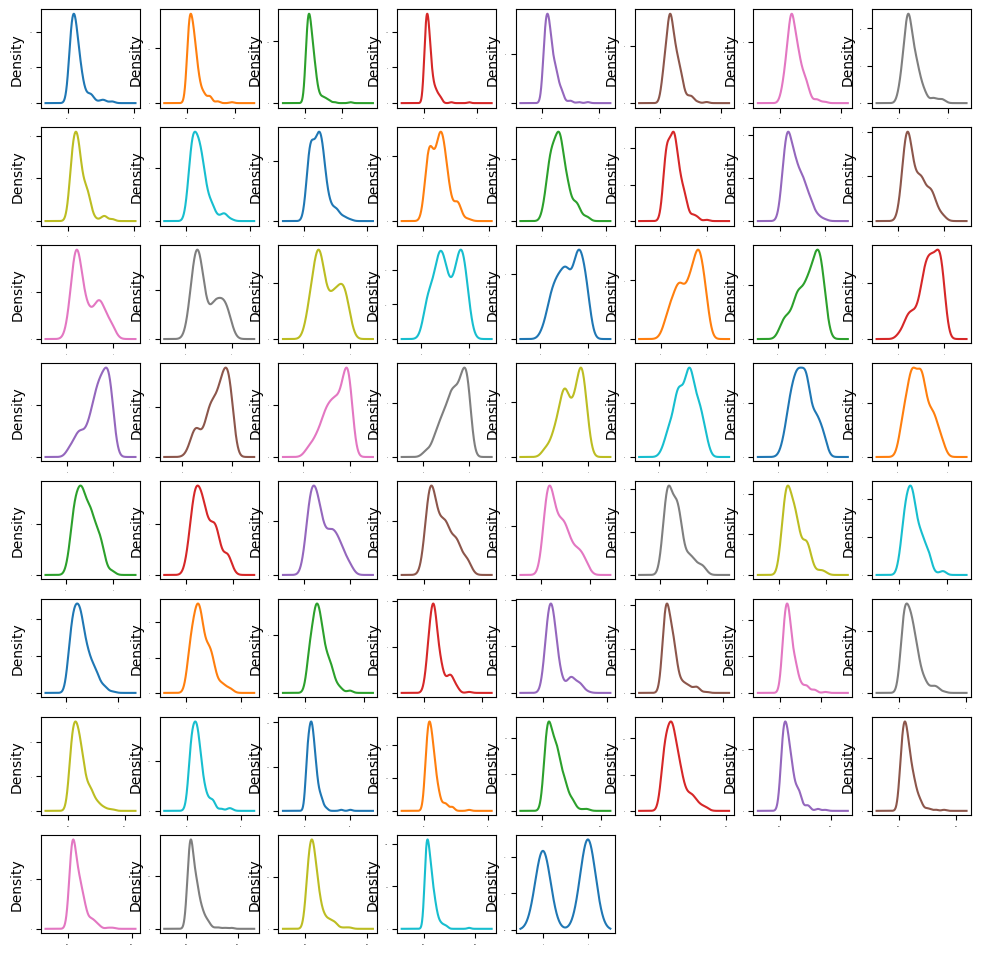

In [ ]:
# Density

df.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(12,12));

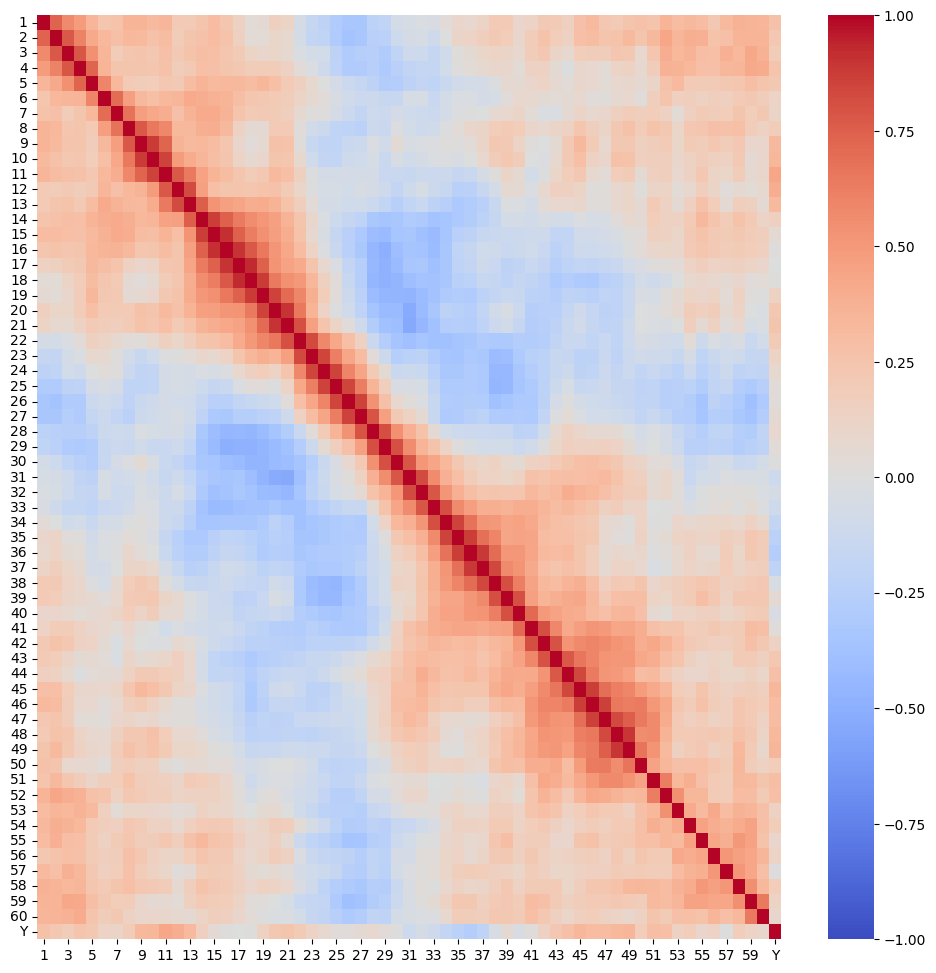

In [ ]:
#Correlation matrix

corrs = df.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corrs, cmap = 'coolwarm', annot = False, vmin = -1, vmax = 1)
plt.show()

# Splitting Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [ ]:
print(f'{X_train.shape}\n{X_test.shape}\n{y_train.shape}\n{y_test.shape}')

(166, 60)
(42, 60)
(166,)
(42,)


#센서 4개 조합까지 기본적인 로지스틱 모델 돌리기

In [ ]:
# 베이지안 없음
def lr_sensors1(num):  #num: 한 조합당 센서의 개수
    #모든 조합 만들기
    all_combinations = list(combinations(X_train.columns, num))

    combs = {}
    accs = {}
    fnrs = {}

    for combination in tqdm(all_combinations):
        #특성 선택
        selected_combination = list(combination)

        X_train1 = X_train[selected_combination]
        X_test1 = X_test[selected_combination]
        y_train1 = y_train
        y_test1 = y_test

        #로지스틱 모델 생성
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train1, y_train1)

        #최적 모델로 예측
        y_pred = model.predict(X_test1)

        #정확도 저장
        accuracy = accuracy_score(y_test1, y_pred)
        accs[combination] = accuracy

        #FNR(실제 1인데 0으로 예측한 비율) 저장
        conf_matrix = confusion_matrix(y_test1, y_pred)
        TP = conf_matrix[1, 1]  #True Positive
        FN = conf_matrix[1, 0]  #False Negative
        fnr = FN / (TP + FN)
        fnrs[combination] = fnr

        #조합 저장
        combs[combination] = combination

    result_df = pd.DataFrame({'Sensors': combs,
                              'Accuracy': accs,
                              'FNR': fnrs}).reset_index(drop=True)
    return result_df

In [ ]:
df_no = pd.DataFrame(columns=['Sensors', 'Accuracy', 'FNR'])
for i in range(1, 61):
    df_name = f'df_{i}'
    df_name = lr_sensors1(i)
    df_no = pd.concat([df_no, df_name], ignore_index=True)
df_no

  0%|          | 17484/5461512 [02:34<13:19:54, 113.43it/s]


KeyboardInterrupt: ignored

조합 4개까지 했음.

In [ ]:
df_no

,Sensors,Accuracy,FNR
0,"(1,)",0.642857,0.000000
1,"(2,)",0.642857,0.000000
2,"(3,)",0.642857,0.000000
3,"(4,)",0.690476,0.074074
4,"(5,)",0.547619,0.407407
...,...,...,...
523680,"(56, 57, 58, 59)",0.642857,0.000000
523681,"(56, 57, 58, 60)",0.642857,0.000000
523682,"(56, 57, 59, 60)",0.642857,0.000000
523683,"(56, 58, 59, 60)",0.642857,0.000000


In [ ]:
df_no.to_csv('/content/drive/MyDrive/BADA/1109 분류 모델 실습/로지스틱_센서4개조합까지.csv')

In [ ]:
df_no['Accuracy'].describe()

count    523685.000000
mean          0.612918
std           0.082826
min           0.333333
25%           0.547619
50%           0.619048
75%           0.666667
max           0.880952
Name: Accuracy, dtype: float64

In [ ]:
df_no['FNR'].describe()

count    523685.000000
mean          0.387858
std           0.099883
min           0.000000
25%           0.333333
50%           0.407407
75%           0.444444
max           0.703704
Name: FNR, dtype: float64

In [ ]:
df_no[df_no['Accuracy'] == df_no['Accuracy'].max()]

,Sensors,Accuracy,FNR
274668,"(10, 11, 36, 44)",0.880952,0.111111
287109,"(10, 26, 36, 45)",0.880952,0.111111
291192,"(10, 36, 42, 45)",0.880952,0.111111
316421,"(12, 17, 34, 43)",0.880952,0.111111
326029,"(12, 33, 43, 46)",0.880952,0.111111
326656,"(12, 35, 43, 48)",0.880952,0.111111


price의 index는 sensors의 index에서 -1 해야 함.

In [ ]:
df_no[df_no['Accuracy'] <= 0.5]

,Sensors,Accuracy,FNR
18,"(19,)",0.476190,0.592593
20,"(21,)",0.476190,0.518519
21,"(22,)",0.500000,0.444444
22,"(23,)",0.476190,0.518519
28,"(29,)",0.452381,0.407407
...,...,...,...
520060,"(42, 44, 57, 59)",0.500000,0.518519
520061,"(42, 44, 57, 60)",0.500000,0.518519
520062,"(42, 44, 58, 59)",0.500000,0.518519
520063,"(42, 44, 58, 60)",0.500000,0.518519


## 가격 확인

In [ ]:
price = price.astype('int64')

In [ ]:
price.describe()

count       60.000000
mean     11640.000000
std       5309.064842
min       2700.000000
25%       8100.000000
50%      11100.000000
75%      14400.000000
max      28500.000000
Name: 가격, dtype: float64

In [ ]:
#(10, 11, 36, 44)
print(price[9], price[10], price[35], price[43])
#(10, 26, 36, 45)
print(price[9], price[25], price[35], price[44])
#(10, 36, 42, 45)
print(price[9], price[35], price[41], price[44])
#(12, 17, 34, 43)
print(price[11], price[16], price[33], price[42])
#(12, 33, 43, 46)
print(price[11], price[32], price[42], price[45])
#(12, 35, 43, 48)
print(price[11], price[34], price[42], price[47])

11100 23400 8100 6900
11100 3000 8100 4200
11100 8100 9000 4200
28500 7500 9900 7800
28500 15900 7800 14700
28500 6900 7800 21900


#위에서 선별한 센서들에 대해서만 로지스틱 모델 돌리기

In [ ]:
def lr_sensors2(num):  #num: 한 조합당 센서의 개수
    #모든 조합 만들기
    all_combinations = list(combinations(['10','11','36','44','26','45','42','12','17','34','43','33','46','35','48'], num))

    combs = {}
    accs = {}
    fnrs = {}

    for combination in tqdm(all_combinations):
        #특성 선택
        selected_combination = list(combination)

        X_train1 = X_train[selected_combination]
        X_test1 = X_test[selected_combination]
        y_train1 = y_train
        y_test1 = y_test

        #로지스틱 모델 생성
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train1, y_train1)

        #최적 모델로 예측
        y_pred = model.predict(X_test1)

        #정확도 저장
        accuracy = accuracy_score(y_test1, y_pred)
        accs[combination] = accuracy

        #FNR(실제 1인데 0으로 예측한 비율) 저장
        conf_matrix = confusion_matrix(y_test1, y_pred)
        TP = conf_matrix[1, 1]  #True Positive
        FN = conf_matrix[1, 0]  #False Negative
        fnr = FN / (TP + FN)
        fnrs[combination] = fnr

        #조합 저장
        combs[combination] = combination

    result_df = pd.DataFrame({'Sensors': combs,
                              'Accuracy': accs,
                              'FNR': fnrs}).reset_index(drop=True)
    return result_df

In [ ]:
df_no2 = pd.DataFrame(columns=['Sensors', 'Accuracy', 'FNR'])
for i in range(5, 16):
    df_name = f'df_{i}'
    df_name = lr_sensors2(i)
    df_no2 = pd.concat([df_no2, df_name], ignore_index=True)
df_no2

100%|██████████| 1/1 [00:00<00:00, 37.82it/s]


,Sensors,Accuracy,FNR
0,"(10, 11, 36, 44, 26)",0.880952,0.111111
1,"(10, 11, 36, 44, 45)",0.833333,0.185185
2,"(10, 11, 36, 44, 42)",0.833333,0.185185
3,"(10, 11, 36, 44, 12)",0.809524,0.185185
4,"(10, 11, 36, 44, 17)",0.833333,0.185185
...,...,...,...
30822,"(10, 11, 36, 26, 45, 42, 12, 17, 34, 43, 33, 4...",0.833333,0.185185
30823,"(10, 11, 44, 26, 45, 42, 12, 17, 34, 43, 33, 4...",0.833333,0.148148
30824,"(10, 36, 44, 26, 45, 42, 12, 17, 34, 43, 33, 4...",0.857143,0.148148
30825,"(11, 36, 44, 26, 45, 42, 12, 17, 34, 43, 33, 4...",0.809524,0.222222


In [ ]:
df_no2[df_no2['Accuracy'] == df_no2['Accuracy'].max()]

,Sensors,Accuracy,FNR
2415,"(44, 42, 12, 17, 34)",0.904762,0.074074
26136,"(10, 11, 36, 44, 45, 42, 12, 17, 34, 33)",0.904762,0.111111


## 가격 확인

In [ ]:
print(price[43], price[41], price[11], price[16], price[33])
print(price[9], price[10], price[35], price[43], price[44], price[41], price[11], price[16], price[33], price[32])

6900 9000 28500 7500 9900
11100 23400 8100 6900 4200 9000 28500 7500 9900 15900


In [ ]:
df_no2['Accuracy'].describe()

count    30827.000000
mean         0.785664
std          0.044789
min          0.523810
25%          0.761905
50%          0.785714
75%          0.809524
max          0.904762
Name: Accuracy, dtype: float64

## acc, fnr, fpr 구하기

In [ ]:
# 최적 모델 후보들에 대해 성능 구하기

selected_combination = ['12','17','34','42','44']
print(selected_combination)

X_train1 = X_train[selected_combination]
X_test1 = X_test[selected_combination]
y_train1 = y_train
y_test1 = y_test

#로지스틱 모델 생성
model = LogisticRegression(max_iter=1000)
model.fit(X_train1, y_train1)

#최적 모델로 예측
y_pred = model.predict(X_test1)

#정확도 저장
accuracy = accuracy_score(y_test1, y_pred)
print('acc', accuracy)

#FNR(실제 1인데 0으로 예측한 비율) 저장
conf_matrix = confusion_matrix(y_test1, y_pred)
TP = conf_matrix[1, 1]  #True Positive
FN = conf_matrix[1, 0]  #False Negative
fnr = FN / (TP + FN)
print('fnr', fnr)

#FPR(1로 예측했는데 실제 0인 비율) 저장
FP = conf_matrix[0, 1]
TP = conf_matrix[1, 1]
fpr = FP / (TP + FP)
print('fpr', fpr)

['12', '17', '34', '42', '44']
acc 0.9047619047619048
fnr 0.07407407407407407
fpr 0.07407407407407407


In [ ]:
# 최적 모델 후보들에 대해 성능 구하기

selected_combination = ['10','26','36','45']
print(selected_combination)

X_train1 = X_train[selected_combination]
X_test1 = X_test[selected_combination]
y_train1 = y_train
y_test1 = y_test

#로지스틱 모델 생성
model = LogisticRegression(max_iter=1000)
model.fit(X_train1, y_train1)

#최적 모델로 예측
y_pred = model.predict(X_test1)

#정확도 저장
accuracy = accuracy_score(y_test1, y_pred)
print('acc', accuracy)

#FNR(실제 1인데 0으로 예측한 비율) 저장
conf_matrix = confusion_matrix(y_test1, y_pred)
TP = conf_matrix[1, 1]  #True Positive
FN = conf_matrix[1, 0]  #False Negative
fnr = FN / (TP + FN)
print('fnr', fnr)

#FPR(1로 예측했는데 실제 0인 비율) 저장
FP = conf_matrix[0, 1]
TP = conf_matrix[1, 1]
fpr = FP / (TP + FP)
print('fpr', fpr)

['10', '26', '36', '45']
acc 0.8809523809523809
fnr 0.1111111111111111
fpr 0.07692307692307693


In [ ]:
# 최적 모델 후보들에 대해 성능 구하기

selected_combination = ['10', '36', '42', '45']
print(selected_combination)

X_train1 = X_train[selected_combination]
X_test1 = X_test[selected_combination]
y_train1 = y_train
y_test1 = y_test

#로지스틱 모델 생성
model = LogisticRegression(max_iter=1000)
model.fit(X_train1, y_train1)

#최적 모델로 예측
y_pred = model.predict(X_test1)

#정확도 저장
accuracy = accuracy_score(y_test1, y_pred)
print('acc', accuracy)

#FNR(실제 1인데 0으로 예측한 비율) 저장
conf_matrix = confusion_matrix(y_test1, y_pred)
TP = conf_matrix[1, 1]  #True Positive
FN = conf_matrix[1, 0]  #False Negative
fnr = FN / (TP + FN)
print('fnr', fnr)

#FPR(1로 예측했는데 실제 0인 비율) 저장
FP = conf_matrix[0, 1]
TP = conf_matrix[1, 1]
fpr = FP / (TP + FP)
print('fpr', fpr)

['10', '36', '42', '45']
acc 0.8809523809523809
fnr 0.1111111111111111
fpr 0.07692307692307693


## 하이퍼파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# 최적의 조합 입력하면 베이지안 최적화 사용하여 하이퍼파라미터 튜닝 후 가장 좋은 성능 출력
def lr_tuning(*args):  #*args: 여러 개의 입력값 입력 가능

    combs = {}
    accs_train = {}
    accs_test = {}
    fnrs = {}
    fprs = {}
    aucs = {}
    best_params = {}

    selected_combination = list(args)

    X_train1 = X_train[selected_combination]
    X_test1 = X_test[selected_combination]
    y_train1 = y_train
    y_test1 = y_test

    #로지스틱 모델 생성
    model = LogisticRegression()

    #Bayesian Optimization을 위한 하이퍼파라미터 공간 정의
    param_space = {
        'C': Real(1e-3, 1e+3, prior='log-uniform'),  #규제 강도.
                                                     #log-uniform 분포는 큰 범위에서의 샘플링에 유용
                                                     #Real: 범위 내에서 실수값 샘플링 가능
        'max_iter': Integer(1000, 10000, prior='log-uniform')}

    opt = BayesSearchCV(model, param_space, cv=10, n_jobs=-1)
    opt.fit(X_train1, y_train1)

    y_pred_train = opt.predict(X_train1)
    y_pred_test = opt.predict(X_test1)

    #정확도 저장
    accuracy_train = accuracy_score(y_train1, y_pred_train)
    accuracy_test = accuracy_score(y_test1, y_pred_test)
    accs_train[tuple(args)] = round(accuracy_train, 4)
    accs_test[tuple(args)] = round(accuracy_test, 4)

    #best parameter 저장
    best_params[args] = opt.best_params_

    #FNR(실제 1인데 0으로 예측한 비율) 저장
    conf_matrix = confusion_matrix(y_test1, y_pred_test)
    TP = conf_matrix[1, 1]  #True Positive
    FN = conf_matrix[1, 0]  #False Negative
    fnr = FN / (TP + FN)
    fnrs[tuple(args)] = round(fnr, 4)

    #FPR(1로 예측했는데 실제 0인 비율) 저장
    FP = conf_matrix[0, 1]
    TP = conf_matrix[1, 1]
    fpr = FP / (TP + FP)
    fprs[tuple(args)] = round(fpr, 4)

    #AUC 저장
    y_prob = opt.predict_proba(X_test1)[:, 1]
    fpr1, tpr1, thresholds = roc_curve(y_test1, y_prob)
    aucs[tuple(args)] = round(auc(fpr1, tpr1), 4)

    #조합 저장
    combs[tuple(args)] = selected_combination

    result_df = pd.DataFrame({'Sensors': combs,
                              'Accuracy_train': accs_train,
                              'Accuracy_test': accs_test,
                              'FNR': fnrs,
                              'FPR': fprs,
                              'AUC': aucs,
                              'Best_Params': best_params
                              }).reset_index(drop=True)
    return result_df

In [ ]:
df_lr_opt = pd.DataFrame(columns=['Sensors', 'Accuracy_train', 'Accuracy_test', 'FNR', 'FPR', 'AUC', 'Best_Params'])
for i in [('12','17','34','42','44'), ('10','26','36','45'), ('10','36','42','45')]:
    df_lr_opt1 = lr_tuning(*i)
    df_lr_opt = pd.concat([df_lr_opt, df_lr_opt1], ignore_index=True)
df_lr_opt

,Sensors,Accuracy_train,Accuracy_test,FNR,FPR,AUC,Best_Params
0,"[12, 17, 34, 42, 44]",0.7108,0.9048,0.0741,0.0741,0.8716,"{'C': 2.6037523690193916, 'max_iter': 9899}"
1,"[10, 26, 36, 45]",0.7590,0.8333,0.1481,0.1154,0.8519,"{'C': 15.030492863292057, 'max_iter': 10000}"
2,"[10, 36, 42, 45]",0.7590,0.8571,0.1111,0.1111,0.8543,"{'C': 1.7810870787131148, 'max_iter': 3123}"


#로지스틱 최종 최적 모델의 성능, 비용 출력

In [ ]:
X_train.columns = X_train.columns.astype('int64')
X_test.columns = X_test.columns.astype('int64')

In [ ]:
def lr_sensors_final(*args):

    combs = {}
    accs_train = {}
    accs_test = {}
    fnrs = {}
    fprs = {}
    aucs = {}
    best_params = {}
    price_total = {}
    loss = {}

    selected_combination = list(args)

    X_train1 = X_train[selected_combination]
    X_test1 = X_test[selected_combination]
    y_train1 = y_train
    y_test1 = y_test

    #로지스틱 모델 생성
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train1, y_train1)

    #예측
    y_pred_train = model.predict(X_train1)
    y_pred_test = model.predict(X_test1)

    #정확도 저장
    accuracy_train = accuracy_score(y_train1, y_pred_train)
    accuracy_test = accuracy_score(y_test1, y_pred_test)
    accs_train[str(args)] = round(accuracy_train, 4)
    accs_test[str(args)] = round(accuracy_test, 4)

    #FNR(실제 1인데 0으로 예측한 비율) 저장
    conf_matrix = confusion_matrix(y_test1, y_pred_test)
    TP = conf_matrix[1, 1]  #True Positive
    FN = conf_matrix[1, 0]  #False Negative
    fnr = FN / (TP + FN)
    fnrs[str(args)] = round(fnr, 4)

    #FPR(1로 예측했는데 실제 0인 비율) 저장
    FP = conf_matrix[0, 1]
    TP = conf_matrix[1, 1]
    fpr = FP / (TP + FP)
    fprs[str(args)] = round(fpr, 4)

    #AUC 저장
    y_prob = model.predict_proba(X_test1)[:, 1]
    fpr1, tpr1, thresholds = roc_curve(y_test1, y_prob)
    aucs[str(args)] = round(auc(fpr1, tpr1), 4)

    #조합 저장
    combs[str(args)] = selected_combination

    #총 가격 저장
    selected_combination_m = [element - 1 for element in selected_combination]
    price_total[str(args)] = price[selected_combination_m].sum()

    #비용 저장
    loss[str(args)] = price[selected_combination_m].sum() * 5000 / 12 + price[selected_combination_m].sum() * 100

    result_df = pd.DataFrame({'Sensors': combs,
                              'Accuracy_train': accs_train,
                              'Accuracy_test': accs_test,
                              'FNR': fnrs,
                              'FPR': fprs,
                              'AUC': aucs,
                              'Price Total': price_total,
                              'Loss': loss
                              }).reset_index(drop=True)
    return result_df

In [ ]:
df_lr_opt = pd.DataFrame(columns=['Sensors', 'Accuracy_train', 'Accuracy_test', 'FNR', 'FPR', 'AUC', 'Price Total', 'Loss'])
for i in [(12,17,34,42,44), (10,26,36,45), (10,36,42,45)]:
    df_lr_opt1 = lr_sensors_final(*i)
    df_lr_opt = pd.concat([df_lr_opt, df_lr_opt1], ignore_index=True)
df_lr_opt

,Sensors,Accuracy_train,Accuracy_test,FNR,FPR,AUC,Price Total,Loss
0,"[12, 17, 34, 42, 44]",0.7108,0.9048,0.0741,0.0741,0.8617,61800.0,31930000.0
1,"[10, 26, 36, 45]",0.7590,0.8810,0.1111,0.0769,0.8667,26400.0,13640000.0
2,"[10, 36, 42, 45]",0.7470,0.8810,0.1111,0.0769,0.8519,32400.0,16740000.0


# 센서 1개 조합까지 KNN 모델 돌리기

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def knn_sensors1(num):  #num: 한 조합당 센서의 개수
    #모든 조합 만들기
    all_combinations = list(combinations(X_train.columns, num))

    combs = {}
    accs = {}
    fnrs = {}
    params = {}

    for combination in tqdm(all_combinations):
        #특성 선택
        selected_combination = list(combination)

        X_train1 = X_train[selected_combination]
        X_test1 = X_test[selected_combination]
        y_train1 = y_train
        y_test1 = y_test

        #knn 모델 생성
        k_range = list(range(3, 20, 2))  #k는 3부터 19까지 중 홀수
        param_grid = dict(n_neighbors = k_range)
        model = KNeighborsClassifier()
        grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
        grid.fit(X_train1, y_train1)

        #최적 모델로 예측
        y_pred = grid.predict(X_test1)

        #정확도 저장
        accuracy = accuracy_score(y_test1, y_pred)
        accs[combination] = accuracy

        #FNR(실제 1인데 0으로 예측한 비율) 저장
        conf_matrix = confusion_matrix(y_test1, y_pred)
        TP = conf_matrix[1, 1]  #True Positive
        FN = conf_matrix[1, 0]  #False Negative
        fnr = FN / (TP + FN)
        fnrs[combination] = fnr

        #조합 저장
        combs[combination] = combination

        #하이퍼파라미터 저장
        params[combination] = grid.best_params_

    result_df = pd.DataFrame({'Sensors': combs,
                              'Accuracy': accs,
                              'FNR': fnrs,
                              'K': params}).reset_index(drop=True)
    return result_df

In [ ]:
knn_sensors1(1)

100%|██████████| 60/60 [00:15<00:00,  3.77it/s]


,Sensors,Accuracy,FNR,K
0,"(1,)",0.619048,0.296296,{'n_neighbors': 17}
1,"(2,)",0.619048,0.333333,{'n_neighbors': 17}
2,"(3,)",0.452381,0.518519,{'n_neighbors': 3}
3,"(4,)",0.571429,0.444444,{'n_neighbors': 7}
4,"(5,)",0.595238,0.333333,{'n_neighbors': 15}
5,"(6,)",0.619048,0.259259,{'n_neighbors': 13}
6,"(7,)",0.642857,0.333333,{'n_neighbors': 11}
7,"(8,)",0.595238,0.407407,{'n_neighbors': 3}
8,"(9,)",0.690476,0.333333,{'n_neighbors': 17}
9,"(10,)",0.690476,0.296296,{'n_neighbors': 11}


In [ ]:
X_train.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60'],
      dtype='object')

# 센서 2개 조합까지 KNN 모델 돌리기

In [ ]:
#베이지안 없음
def knn_sensors2(num):  #num: 한 조합당 센서의 개수
    #모든 조합 만들기
    all_combinations = list(combinations(['1', '2', '4', '5', '6', '7', '8', '9',
                                          '10', '11', '12', '13', '15', '17', '20', '24', '25',
                                          '26', '27', '32', '34', '36', '37',
                                          '38', '40', '42', '43', '44', '46', '47', '48', '49',
                                          '50', '51', '52', '55', '58', '59'], num))

    combs = {}
    accs = {}
    fnrs = {}
    params = {}

    for combination in tqdm(all_combinations):
        #특성 선택
        selected_combination = list(combination)

        X_train1 = X_train[selected_combination]
        X_test1 = X_test[selected_combination]
        y_train1 = y_train
        y_test1 = y_test

        #knn 모델 생성
        k_range = list(range(3, 20, 2))  #k는 3부터 19까지 중 홀수
        param_grid = dict(n_neighbors = k_range)
        model = KNeighborsClassifier()
        grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
        grid.fit(X_train1, y_train1)

        #최적 모델로 예측
        y_pred = grid.predict(X_test1)

        #정확도 저장
        accuracy = accuracy_score(y_test1, y_pred)
        accs[combination] = accuracy

        #FNR(실제 1인데 0으로 예측한 비율) 저장
        conf_matrix = confusion_matrix(y_test1, y_pred)
        TP = conf_matrix[1, 1]  #True Positive
        FN = conf_matrix[1, 0]  #False Negative
        fnr = FN / (TP + FN)
        fnrs[combination] = fnr

        #조합 저장
        combs[combination] = combination

        #하이퍼파라미터 저장
        params[combination] = grid.best_params_

    result_df = pd.DataFrame({'Sensors': combs,
                              'Accuracy': accs,
                              'FNR': fnrs,
                              'K': params}).reset_index(drop=True)
    return result_df

In [ ]:
knn_sensors2(2)

100%|██████████| 703/703 [03:14<00:00,  3.61it/s]


,Sensors,Accuracy,FNR,K
0,"(1, 2)",0.500000,0.481481,{'n_neighbors': 17}
1,"(1, 4)",0.666667,0.333333,{'n_neighbors': 19}
2,"(1, 5)",0.595238,0.370370,{'n_neighbors': 17}
3,"(1, 6)",0.642857,0.296296,{'n_neighbors': 19}
4,"(1, 7)",0.642857,0.296296,{'n_neighbors': 11}
...,...,...,...,...
698,"(52, 58)",0.761905,0.222222,{'n_neighbors': 15}
699,"(52, 59)",0.595238,0.407407,{'n_neighbors': 3}
700,"(55, 58)",0.666667,0.222222,{'n_neighbors': 11}
701,"(55, 59)",0.595238,0.407407,{'n_neighbors': 9}


In [ ]:
df_knn2 = knn_sensors2(2)
df_knn2

100%|██████████| 703/703 [03:13<00:00,  3.63it/s]


,Sensors,Accuracy,FNR,K
0,"(1, 2)",0.500000,0.481481,{'n_neighbors': 17}
1,"(1, 4)",0.666667,0.333333,{'n_neighbors': 19}
2,"(1, 5)",0.595238,0.370370,{'n_neighbors': 17}
3,"(1, 6)",0.642857,0.296296,{'n_neighbors': 19}
4,"(1, 7)",0.642857,0.296296,{'n_neighbors': 11}
...,...,...,...,...
698,"(52, 58)",0.761905,0.222222,{'n_neighbors': 15}
699,"(52, 59)",0.595238,0.407407,{'n_neighbors': 3}
700,"(55, 58)",0.666667,0.222222,{'n_neighbors': 11}
701,"(55, 59)",0.595238,0.407407,{'n_neighbors': 9}


In [ ]:
df_knn2[df_knn2['Accuracy']<=0.5]

,Sensors,Accuracy,FNR,K
0,"(1, 2)",0.500000,0.481481,{'n_neighbors': 17}
18,"(1, 32)",0.476190,0.481481,{'n_neighbors': 7}
19,"(1, 34)",0.500000,0.481481,{'n_neighbors': 3}
22,"(1, 38)",0.500000,0.481481,{'n_neighbors': 3}
25,"(1, 43)",0.500000,0.518519,{'n_neighbors': 9}
40,"(2, 7)",0.476190,0.518519,{'n_neighbors': 3}
47,"(2, 15)",0.476190,0.518519,{'n_neighbors': 9}
52,"(2, 26)",0.500000,0.555556,{'n_neighbors': 5}
54,"(2, 32)",0.500000,0.481481,{'n_neighbors': 13}
55,"(2, 34)",0.500000,0.518519,{'n_neighbors': 3}


# 위에서 선별한 센서들에 대해서만 KNN 모델 돌리기

In [ ]:
def knn_sensors3(num):  #num: 한 조합당 센서의 개수
    #모든 조합 만들기
    all_combinations = list(combinations([
                                          '10', '11', '12', '13',  '17',
                                           '36', '37', '46', '48', '49'], num))

    combs = {}
    accs = {}
    fnrs = {}
    params = {}

    for combination in tqdm(all_combinations):
        #특성 선택
        selected_combination = list(combination)

        X_train1 = X_train[selected_combination]
        X_test1 = X_test[selected_combination]
        y_train1 = y_train
        y_test1 = y_test

        #knn 모델 생성
        k_range = list(range(3, 20, 2))  #k는 3부터 19까지 중 홀수
        param_grid = dict(n_neighbors = k_range)
        model = KNeighborsClassifier()
        grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
        grid.fit(X_train1, y_train1)

        #최적 모델로 예측
        y_pred = grid.predict(X_test1)

        #정확도 저장
        accuracy = accuracy_score(y_test1, y_pred)
        accs[combination] = accuracy

        #FNR(실제 1인데 0으로 예측한 비율) 저장
        conf_matrix = confusion_matrix(y_test1, y_pred)
        TP = conf_matrix[1, 1]  #True Positive
        FN = conf_matrix[1, 0]  #False Negative
        fnr = FN / (TP + FN)
        fnrs[combination] = fnr

        #조합 저장
        combs[combination] = combination

        #하이퍼파라미터 저장
        params[combination] = grid.best_params_

    result_df = pd.DataFrame({'Sensors': combs,
                              'Accuracy': accs,
                              'FNR': fnrs,
                              'K': params}).reset_index(drop=True)
    return result_df

In [ ]:
df_knn3 = pd.DataFrame(columns=['Sensors', 'Accuracy', 'FNR', 'K'])
for i in range(3, 11):
    df_name = f'df_{i}'
    df_name = knn_sensors3(i)
    df_knn3 = pd.concat([df_knn3, df_name], ignore_index=True)
df_knn3

100%|██████████| 1/1 [00:00<00:00,  2.42it/s]


,Sensors,Accuracy,FNR,K
0,"(10, 11, 12)",0.857143,0.111111,{'n_neighbors': 15}
1,"(10, 11, 13)",0.761905,0.185185,{'n_neighbors': 19}
2,"(10, 11, 17)",0.714286,0.333333,{'n_neighbors': 19}
3,"(10, 11, 36)",0.809524,0.222222,{'n_neighbors': 11}
4,"(10, 11, 37)",0.738095,0.333333,{'n_neighbors': 15}
...,...,...,...,...
963,"(10, 11, 12, 17, 36, 37, 46, 48, 49)",0.833333,0.185185,{'n_neighbors': 3}
964,"(10, 11, 13, 17, 36, 37, 46, 48, 49)",0.833333,0.148148,{'n_neighbors': 7}
965,"(10, 12, 13, 17, 36, 37, 46, 48, 49)",0.857143,0.148148,{'n_neighbors': 5}
966,"(11, 12, 13, 17, 36, 37, 46, 48, 49)",0.809524,0.185185,{'n_neighbors': 3}


In [ ]:
df_knn3['Accuracy'].describe()

count    968.000000
mean       0.797201
std        0.053802
min        0.547619
25%        0.761905
50%        0.809524
75%        0.833333
max        0.928571
Name: Accuracy, dtype: float64

In [ ]:
df_knn3[df_knn3['Accuracy'] >= 0.881]

,Sensors,Accuracy,FNR,K
347,"(10, 11, 12, 37, 49)",0.928571,0.074074,{'n_neighbors': 3}
426,"(10, 13, 17, 37, 48)",0.904762,0.111111,{'n_neighbors': 5}
615,"(10, 11, 12, 37, 48, 49)",0.904762,0.074074,{'n_neighbors': 3}
695,"(10, 13, 17, 37, 48, 49)",0.904762,0.111111,{'n_neighbors': 5}


## 가격 확인

In [ ]:
print(price[9], price[10], price[11], price[36], price[48])
print(price[9], price[12], price[16], price[36], price[47])
print(price[9], price[10], price[11], price[36], price[47], price[48])
print(price[9], price[12], price[16], price[36], price[47], price[48])

11100 23400 28500 2700 11100
11100 10500 7500 2700 21900
11100 23400 28500 2700 21900 11100
11100 10500 7500 2700 21900 11100


## acc, fnr, fpr 구하기

In [ ]:
#최적 모델 후보들에 대해 성능 구하기

selected_combination = ['10', '13', '17', '37', '48']
print(selected_combination)

X_train1 = X_train[selected_combination]
X_test1 = X_test[selected_combination]
y_train1 = y_train
y_test1 = y_test

#knn 모델 생성
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train1, y_train1)

#최적 모델로 예측
y_pred = model.predict(X_test1)

#정확도 저장
accuracy = accuracy_score(y_test1, y_pred)
print('acc', accuracy)

#FNR(실제 1인데 0으로 예측한 비율) 저장
conf_matrix = confusion_matrix(y_test1, y_pred)
TP = conf_matrix[1, 1]  #True Positive
FN = conf_matrix[1, 0]  #False Negative
fnr = FN / (TP + FN)
print('fnr', fnr)

#FPR(1로 예측했는데 실제 0인 비율) 저장
FP = conf_matrix[0, 1]
TP = conf_matrix[1, 1]
fpr = FP / (TP + FP)
print('fpr', fpr)

['10', '13', '17', '37', '48']
acc 0.9047619047619048
fnr 0.1111111111111111
fpr 0.04


In [ ]:
#최적 모델 후보들에 대해 성능 구하기

selected_combination = ['10', '13', '17', '37', '48', '49']
print(selected_combination)

X_train1 = X_train[selected_combination]
X_test1 = X_test[selected_combination]
y_train1 = y_train
y_test1 = y_test

#knn 모델 생성
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train1, y_train1)

#최적 모델로 예측
y_pred = model.predict(X_test1)

#정확도 저장
accuracy = accuracy_score(y_test1, y_pred)
print('acc', accuracy)

#FNR(실제 1인데 0으로 예측한 비율) 저장
conf_matrix = confusion_matrix(y_test1, y_pred)
TP = conf_matrix[1, 1]  #True Positive
FN = conf_matrix[1, 0]  #False Negative
fnr = FN / (TP + FN)
print('fnr', fnr)

#FPR(1로 예측했는데 실제 0인 비율) 저장
FP = conf_matrix[0, 1]
TP = conf_matrix[1, 1]
fpr = FP / (TP + FP)
print('fpr', fpr)

['10', '13', '17', '37', '48', '49']
acc 0.9047619047619048
fnr 0.1111111111111111
fpr 0.04


## 하이퍼파라미터 튜닝

In [ ]:
#최적의 조합 입력하면 gridsearch CV 사용하여 하이퍼파라미터 튜닝 후 가장 좋은 성능 출력
def lr_tuning_knn(*args):  #*args: 여러 개의 입력값 입력 가능

    combs = {}
    accs_train = {}
    accs_test = {}
    fnrs = {}
    fprs = {}
    aucs = {}
    best_params = {}

    selected_combination = list(args)

    X_train1 = X_train[selected_combination]
    X_test1 = X_test[selected_combination]
    y_train1 = y_train
    y_test1 = y_test

    #로지스틱 모델 생성
    model = KNeighborsClassifier()

    #Bayesian Optimization을 위한 하이퍼파라미터 공간 정의
    param_space = {
        'n_neighbors': Integer(3, 20),
        'p': Integer(1, 3),
        'weights': Categorical(['uniform', 'distance'])
        }

    opt = BayesSearchCV(model, param_space, cv=10, n_jobs=-1)
    opt.fit(X_train1, y_train1)

    y_pred_train = opt.predict(X_train1)
    y_pred_test = opt.predict(X_test1)

    #정확도 저장
    accuracy_train = accuracy_score(y_train1, y_pred_train)
    accuracy_test = accuracy_score(y_test1, y_pred_test)
    accs_train[str(args)] = round(accuracy_train, 4)
    accs_test[str(args)] = round(accuracy_test, 4)

    #best parameter 저장
    best_params[str(args)] = opt.best_params_

    #FNR(실제 1인데 0으로 예측한 비율) 저장
    conf_matrix = confusion_matrix(y_test1, y_pred_test)
    TP = conf_matrix[1, 1]  #True Positive
    FN = conf_matrix[1, 0]  #False Negative
    fnr = FN / (TP + FN)
    fnrs[str(args)] = round(fnr, 4)

    #FPR(1로 예측했는데 실제 0인 비율) 저장
    FP = conf_matrix[0, 1]
    TP = conf_matrix[1, 1]
    fpr = FP / (TP + FP)
    fprs[str(args)] = round(fpr, 4)

    #AUC 저장
    y_prob = opt.predict_proba(X_test1)[:, 1]
    fpr1, tpr1, thresholds = roc_curve(y_test1, y_prob)
    aucs[str(args)] = round(auc(fpr1, tpr1), 4)

    #조합 저장
    combs[str(args)] = selected_combination

    result_df = pd.DataFrame({'Sensors': combs,
                              'Accuracy_train': accs_train,
                              'Accuracy_test': accs_test,
                              'FNR': fnrs,
                              'FPR': fprs,
                              'AUC': aucs,
                              'Best_Params': best_params
                              }).reset_index(drop=True)
    return result_df

In [ ]:
df_lr_opt = pd.DataFrame(columns=['Sensors', 'Accuracy_train', 'Accuracy_test', 'FNR', 'FPR', 'AUC', 'Best_Params'])
for i in [('10','13','17','37','48'), ('10','13','17','37','48','49')]:
    df_lr_opt1 = lr_tuning_knn(*i)
    df_lr_opt = pd.concat([df_lr_opt, df_lr_opt1], ignore_index=True)
df_lr_opt

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist

,Sensors,Accuracy_train,Accuracy_test,FNR,FPR,AUC,Best_Params
0,"[10, 13, 17, 37, 48]",1.0,0.8333,0.2222,0.0455,0.9148,"{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}"
1,"[10, 13, 17, 37, 48, 49]",1.0,0.8333,0.2222,0.0455,0.8889,"{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}"


## KNN 최종 최적 모델의 성능, 비용 출력

In [ ]:
def knn_sensors_final(*args):

    combs = {}
    accs_train = {}
    accs_test = {}
    fnrs = {}
    fprs = {}
    aucs = {}
    best_params = {}
    price_total = {}
    loss = {}

    selected_combination = list(args)

    X_train1 = X_train[selected_combination]
    X_test1 = X_test[selected_combination]
    y_train1 = y_train
    y_test1 = y_test

    model = KNeighborsClassifier(n_neighbors = 5)
    model.fit(X_train1, y_train1)

    #예측
    y_pred_train = model.predict(X_train1)
    y_pred_test = model.predict(X_test1)

    #정확도 저장
    accuracy_train = accuracy_score(y_train1, y_pred_train)
    accuracy_test = accuracy_score(y_test1, y_pred_test)
    accs_train[str(args)] = round(accuracy_train, 4)
    accs_test[str(args)] = round(accuracy_test, 4)

    #FNR(실제 1인데 0으로 예측한 비율) 저장
    conf_matrix = confusion_matrix(y_test1, y_pred_test)
    TP = conf_matrix[1, 1]  #True Positive
    FN = conf_matrix[1, 0]  #False Negative
    fnr = FN / (TP + FN)
    fnrs[str(args)] = round(fnr, 4)

    #FPR(1로 예측했는데 실제 0인 비율) 저장
    FP = conf_matrix[0, 1]
    TP = conf_matrix[1, 1]
    fpr = FP / (TP + FP)
    fprs[str(args)] = round(fpr, 4)

    #AUC 저장
    y_prob = model.predict_proba(X_test1)[:, 1]
    fpr1, tpr1, thresholds = roc_curve(y_test1, y_prob)
    aucs[str(args)] = round(auc(fpr1, tpr1), 4)

    #조합 저장
    combs[str(args)] = selected_combination

    #총 가격 저장
    selected_combination_m = [element - 1 for element in selected_combination]
    price_total[str(args)] = price[selected_combination_m].sum()

    #비용 저장
    loss[str(args)] = price[selected_combination_m].sum() * 5000 / 12 + price[selected_combination_m].sum() * 100

    result_df = pd.DataFrame({'Sensors': combs,
                              'Accuracy_train': accs_train,
                              'Accuracy_test': accs_test,
                              'FNR': fnrs,
                              'FPR': fprs,
                              'AUC': aucs,
                              'Price Total': price_total,
                              'Loss': loss
                              }).reset_index(drop=True)
    return result_df

In [ ]:
df_lr_opt = pd.DataFrame(columns=['Sensors', 'Accuracy_train', 'Accuracy_test', 'FNR', 'FPR', 'AUC', 'Price Total', 'Loss'])
for i in [(10,13,17,37,48), (10,13,17,37,48,49)]:
    df_lr_opt1 = knn_sensors_final(*i)
    df_lr_opt = pd.concat([df_lr_opt, df_lr_opt1], ignore_index=True)
df_lr_opt

,Sensors,Accuracy_train,Accuracy_test,FNR,FPR,AUC,Price Total,Loss
0,"[10, 13, 17, 37, 48]",0.8675,0.9048,0.1111,0.04,0.9210,53700.0,27745000.0
1,"[10, 13, 17, 37, 48, 49]",0.8675,0.9048,0.1111,0.04,0.9148,64800.0,33480000.0
